In [7]:
#apiDict.json
#relevanthashes.csv
#model/apiCallsToLetters.csv

In [8]:
name_to_letters={}
aa=open("apiCallsToLetters.csv")
for a in aa:
    a=a.rstrip()
    a=a.split(",")
    for item in a[1:]:
        if item!='':
            name_to_letters[item]=a[0]

In [9]:
print(name_to_letters)

 'AppendMenuA': 'H', 'SetMenu': 'H', 'IsCharAlphaNumericA': 'H', 'IsWindowUnicode': 'H', 'SetCaretPos': 'H', 'LoadCursorFromFileW': 'H', 'HideCaret': 'H', 'ShowCaret': 'H', 'IsBadStringPtrA': 'H', 'CreateIconFromResourceEx': 'H', 'CharToOemBuffA': 'H', 'CopyIcon': 'H', 'BeginUpdateResourceW': 'H', 'BeginUpdateResourceA': 'H', 'UpdateResourceW': 'H', 'UpdateResourceA': 'H', 'IsMenu': 'H', 'LoadAcceleratorsA': 'H', 'CharToOemA': 'H', 'DestroyAcceleratorTable': 'H', 'IsCharUpperA': 'H', 'CreatePopupMenu': 'H', 'InsertMenuW': 'H', 'GetMenuDefaultItem': 'H', 'SetMenuDefaultItem': 'H', 'GetMenuItemID': 'H', 'CreateMenu': 'H', 'EndUpdateResourceW': 'H', 'EndUpdateResourceA': 'H', 'LoadMenuA': 'H', 'DrawMenuBar': 'H', 'IsCharAlphaA': 'H', 'GetCursor': 'H', 'IsCharAlphaW': 'H', 'ShowCursor': 'H', 'FoldStringW': 'H', 'CreateIconIndirect': 'H', 'CreateAcceleratorTableA': 'H', 'AppendMenuW': 'H', 'IsCharAlphaNumericW': 'H', 'GetCaretPos': 'H', 'CheckMenuItem': 'H', 'GetClipCursor': 'H', 'CharToOem

In [37]:
import json
with open('apiDict.json') as json_file: 
    api_to_num = json.load(json_file) 

In [38]:
num_to_api= {v: k for k, v in api_to_num.items()}


In [43]:
import pandas as pd 
df = pd.read_csv('api_calls.csv',header=None,sep='\t') 
from csv import reader
# read csv file as a list of lists
with open('api_calls.csv', 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Pass reader object to list() to get a list of lists
    list_of_rows = list(csv_reader)

In [44]:
for i in range(0,len(list_of_rows)):
    seq=list_of_rows[i][1:(len(list_of_rows[i])-1)]
    label = list_of_rows[i][len(list_of_rows[i])-1]
    if (label == '1'):
        filename = "malware.txt"
    else:
        filename = "benign.txt"
    wf=open(filename,"a")
    encoded=""
    for item in seq:
        if item=="":
            continue
        item=int(item)
        if item in num_to_api:
            if item!="":
                name=num_to_api[item]
                if name in name_to_letters:
                    letter=name_to_letters[name]
                    encoded+=letter
    
    wf.write("\t")
    wf.write(encoded)
    wf.write("\n")

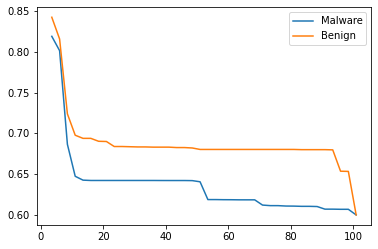

In [46]:
import pickle
mals_results=[]
benign_results=[]
with open('result_malware','rb') as f:
    mals_results.extend(pickle.load(f))
with open('result_benign','rb') as f:
    benign_results.extend(pickle.load(f))
mals=[]
for item in mals_results:
    mals.append(item[0][1])
benigns=[]
for item in benign_results:
    benigns.append(item[0][1])
# Choose how many bins you want here
num_bins = 40
# Use the histogram function to bin the data
counts1, bin_edges1 = np.histogram(mals, bins=num_bins, normed=True)
# Now find the cdf
cdfmal = np.cumsum(counts1)
counts2,bin_edges2=np.histogram(benigns,bins=num_bins,normed=True)
cdfbenign=np.cumsum(counts2)
# And finally plot the cdf
plt.plot(bin_edges1[1:], 1-cdfmal,label="Malware")
plt.plot(bin_edges2[1:], 1-cdfbenign,label="Benign")
plt.legend()
plt.show()

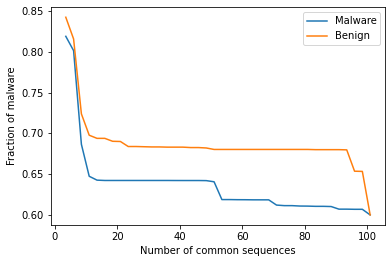

In [47]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

mals_results=[]
benign_results=[]
with open('result_malware','rb') as f:
    mals_results.extend(pickle.load(f))
with open('result_benign','rb') as f:
    benign_results.extend(pickle.load(f))
mals=[]
for item in mals_results:
    mals.append(item[0][1])
benigns=[]
for item in benign_results:
    benigns.append(item[0][1])
# Choose how many bins you want here
num_bins = 40
# Use the histogram function to bin the data
counts1, bin_edges1 = np.histogram(mals, bins=num_bins, normed=True)
# Now find the cdf
cdfmal = np.cumsum(counts1)
counts2,bin_edges2=np.histogram(benigns,bins=num_bins,normed=True)
cdfbenign=np.cumsum(counts2)
# And finally plot the cdf
plt.plot(bin_edges1[1:], 1-cdfmal,label="Malware")
plt.plot(bin_edges2[1:], 1-cdfbenign,label="Benign")
plt.xlabel("Number of common sequences")
plt.ylabel("Fraction of malware")
plt.legend()
plt.show()